# Analysis for SSFA project: Preprocessing of data
# Filtered for < 20% NMP

## Table of contents
1. [Used packages](#imports)
1. [Global settings](#settings)
1. [Load data](#load)
1. [Data conversion](#conversion)
1. [Write out](#write)

## Used packages <a name="imports"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pickle
import arviz as az
import pymc3 as pm
from matplotlib.colors import to_rgb
import scipy.stats as stats 
from IPython.display import display
import matplotlib as mpl

## Global settings <a name="settings"></a>

#### Plotting

In [2]:
widthMM = 190 
widthInch = widthMM / 25.4
ratio = 0.66666
heigthInch = ratio*widthInch

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
sns.set_style("ticks")

dpi = 300

## Load data <a name="load"></a>

In [3]:
inFile = '../../R_analysis/derived_data/SSFA_all_data.xlsx'

#### Show data

In [4]:
df = pd.read_excel(inFile)
df

,Dataset,Name,Software,Diet,Treatment,Before.after,NMP,NMP_cat,epLsar,Rsquared,Asfc,Smfc,HAsfc9,HAsfc81,NewEplsar
0,GuineaPigs,capor_2CC4B1_txP4_#1_1_100xL_1,ConfoMap,Dry lucerne,NaN,NaN,1.896275,0-5%,0.001960,0.996718,16.007166,0.330369,0.178590,0.390893,0.018424
1,GuineaPigs,capor_2CC4B1_txP4_#1_1_100xL_1,Toothfrax,Dry lucerne,NaN,NaN,1.896275,0-5%,0.001471,0.999343,12.925787,0.119219,0.181994,0.336894,NaN
2,GuineaPigs,capor_2CC4B1_txP4_#1_1_100xL_2,ConfoMap,Dry lucerne,NaN,NaN,1.307524,0-5%,0.003662,0.997693,14.059325,0.349875,0.136064,0.443493,0.018889
3,GuineaPigs,capor_2CC4B1_txP4_#1_1_100xL_2,Toothfrax,Dry lucerne,NaN,NaN,1.307524,0-5%,0.002693,0.999514,11.999816,0.119219,0.158604,0.381862,NaN
4,GuineaPigs,capor_2CC4B1_txP4_#1_1_100xL_3,ConfoMap,Dry lucerne,NaN,NaN,0.806428,0-5%,0.003140,0.997367,15.123215,0.330369,0.130630,0.356667,0.018703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,Lithics,QTZ3-5_LSM_50x-0.95_20190418_Area2_Topo,Toothfrax,NaN,BrushNoDirt,Before,2.646178,0-5%,0.002035,0.998930,23.258608,0.058054,1.013030,1.465493,NaN
280,Lithics,QTZ3-5_LSM2_50x-0.95_20190731_Area1_Topo,ConfoMap,NaN,BrushNoDirt,After,0.327121,0-5%,0.006007,0.987344,5.671158,9.899664,0.861890,1.591851,0.020109
281,Lithics,QTZ3-5_LSM2_50x-0.95_20190731_Area1_Topo,Toothfrax,NaN,BrushNoDirt,After,0.327121,0-5%,0.005429,0.995536,5.658399,3.051471,0.553206,2.171753,NaN
282,Lithics,QTZ3-5_LSM2_50x-0.95_20190731_Area2_Topo,ConfoMap,NaN,BrushNoDirt,After,1.731628,0-5%,0.004158,0.994780,9.493842,2.099446,0.759544,3.567649,0.019375


#### Create unfied column for treatment

In [5]:
df = df.assign(Treatment=df.apply(lambda row: row['Diet'] if str(row['Treatment']) == "nan" else row['Treatment'],axis=1))
df

,Dataset,Name,Software,Diet,Treatment,Before.after,NMP,NMP_cat,epLsar,Rsquared,Asfc,Smfc,HAsfc9,HAsfc81,NewEplsar
0,GuineaPigs,capor_2CC4B1_txP4_#1_1_100xL_1,ConfoMap,Dry lucerne,Dry lucerne,NaN,1.896275,0-5%,0.001960,0.996718,16.007166,0.330369,0.178590,0.390893,0.018424
1,GuineaPigs,capor_2CC4B1_txP4_#1_1_100xL_1,Toothfrax,Dry lucerne,Dry lucerne,NaN,1.896275,0-5%,0.001471,0.999343,12.925787,0.119219,0.181994,0.336894,NaN
2,GuineaPigs,capor_2CC4B1_txP4_#1_1_100xL_2,ConfoMap,Dry lucerne,Dry lucerne,NaN,1.307524,0-5%,0.003662,0.997693,14.059325,0.349875,0.136064,0.443493,0.018889
3,GuineaPigs,capor_2CC4B1_txP4_#1_1_100xL_2,Toothfrax,Dry lucerne,Dry lucerne,NaN,1.307524,0-5%,0.002693,0.999514,11.999816,0.119219,0.158604,0.381862,NaN
4,GuineaPigs,capor_2CC4B1_txP4_#1_1_100xL_3,ConfoMap,Dry lucerne,Dry lucerne,NaN,0.806428,0-5%,0.003140,0.997367,15.123215,0.330369,0.130630,0.356667,0.018703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,Lithics,QTZ3-5_LSM_50x-0.95_20190418_Area2_Topo,Toothfrax,NaN,BrushNoDirt,Before,2.646178,0-5%,0.002035,0.998930,23.258608,0.058054,1.013030,1.465493,NaN
280,Lithics,QTZ3-5_LSM2_50x-0.95_20190731_Area1_Topo,ConfoMap,NaN,BrushNoDirt,After,0.327121,0-5%,0.006007,0.987344,5.671158,9.899664,0.861890,1.591851,0.020109
281,Lithics,QTZ3-5_LSM2_50x-0.95_20190731_Area1_Topo,Toothfrax,NaN,BrushNoDirt,After,0.327121,0-5%,0.005429,0.995536,5.658399,3.051471,0.553206,2.171753,NaN
282,Lithics,QTZ3-5_LSM2_50x-0.95_20190731_Area2_Topo,ConfoMap,NaN,BrushNoDirt,After,1.731628,0-5%,0.004158,0.994780,9.493842,2.099446,0.759544,3.567649,0.019375


In [6]:
df.Treatment.unique()

array(['Dry lucerne', 'Dry grass', 'Dry bamboo', 'Clover', 'Clover+dust',
       'Grass', 'Grass+dust', 'BrushDirt', 'RubDirt', 'Control',
       'BrushNoDirt'], dtype=object)

#### Sort data for later enumeration

In [7]:
df = df.sort_values(["Dataset","Treatment","Name","Software"]).reset_index(drop=True)
df

,Dataset,Name,Software,Diet,Treatment,Before.after,NMP,NMP_cat,epLsar,Rsquared,Asfc,Smfc,HAsfc9,HAsfc81,NewEplsar
0,GuineaPigs,capor_2CC6B1_txP4_#1_1_100xL_1,ConfoMap,Dry bamboo,Dry bamboo,NaN,0.717312,0-5%,0.004417,0.998003,11.656095,0.294557,0.135803,0.363319,0.019460
1,GuineaPigs,capor_2CC6B1_txP4_#1_1_100xL_1,Toothfrax,Dry bamboo,Dry bamboo,NaN,0.717312,0-5%,0.004721,0.999560,10.320730,0.119219,0.135471,0.361833,NaN
2,GuineaPigs,capor_2CC6B1_txP4_#1_1_100xL_2,ConfoMap,Dry bamboo,Dry bamboo,NaN,1.674215,0-5%,0.005866,0.996198,15.467083,0.294557,0.171903,0.296292,0.020079
3,GuineaPigs,capor_2CC6B1_txP4_#1_1_100xL_2,Toothfrax,Dry bamboo,Dry bamboo,NaN,1.674215,0-5%,0.005856,0.999467,13.199232,0.119219,0.169232,0.261217,NaN
4,GuineaPigs,capor_2CC6B1_txP4_#1_1_100xL_3,ConfoMap,Dry bamboo,Dry bamboo,NaN,1.760409,0-5%,0.005042,0.994788,13.201101,0.294557,0.261235,0.405422,0.019722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,Sheeps,L8-Ovis-90730-lm2sin-a,Toothfrax,Grass+dust,Grass+dust,NaN,0.000000,0-5%,0.004424,0.999360,1.819802,1.408678,0.836560,1.111706,NaN
280,Sheeps,L8-Ovis-90764-lm2sin-a,ConfoMap,Grass+dust,Grass+dust,NaN,0.000000,0-5%,0.003403,0.998850,2.864831,0.486556,0.637499,1.538943,0.018978
281,Sheeps,L8-Ovis-90764-lm2sin-a,Toothfrax,Grass+dust,Grass+dust,NaN,0.000000,0-5%,0.003139,0.999739,2.758297,0.133366,0.955699,1.831721,NaN
282,Sheeps,L8-Ovis-90814-lm2sin-a,ConfoMap,Grass+dust,Grass+dust,NaN,0.000000,0-5%,0.001220,0.999479,1.481662,1.237247,0.370691,0.804138,0.017498


## Data filtering

In [8]:
df = df[df.NMP_cat != "20-100%"].reset_index(drop=True)
df

,Dataset,Name,Software,Diet,Treatment,Before.after,NMP,NMP_cat,epLsar,Rsquared,Asfc,Smfc,HAsfc9,HAsfc81,NewEplsar
0,GuineaPigs,capor_2CC6B1_txP4_#1_1_100xL_1,ConfoMap,Dry bamboo,Dry bamboo,NaN,0.717312,0-5%,0.004417,0.998003,11.656095,0.294557,0.135803,0.363319,0.019460
1,GuineaPigs,capor_2CC6B1_txP4_#1_1_100xL_1,Toothfrax,Dry bamboo,Dry bamboo,NaN,0.717312,0-5%,0.004721,0.999560,10.320730,0.119219,0.135471,0.361833,NaN
2,GuineaPigs,capor_2CC6B1_txP4_#1_1_100xL_2,ConfoMap,Dry bamboo,Dry bamboo,NaN,1.674215,0-5%,0.005866,0.996198,15.467083,0.294557,0.171903,0.296292,0.020079
3,GuineaPigs,capor_2CC6B1_txP4_#1_1_100xL_2,Toothfrax,Dry bamboo,Dry bamboo,NaN,1.674215,0-5%,0.005856,0.999467,13.199232,0.119219,0.169232,0.261217,NaN
4,GuineaPigs,capor_2CC6B1_txP4_#1_1_100xL_3,ConfoMap,Dry bamboo,Dry bamboo,NaN,1.760409,0-5%,0.005042,0.994788,13.201101,0.294557,0.261235,0.405422,0.019722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,Sheeps,L8-Ovis-90730-lm2sin-a,Toothfrax,Grass+dust,Grass+dust,NaN,0.000000,0-5%,0.004424,0.999360,1.819802,1.408678,0.836560,1.111706,NaN
274,Sheeps,L8-Ovis-90764-lm2sin-a,ConfoMap,Grass+dust,Grass+dust,NaN,0.000000,0-5%,0.003403,0.998850,2.864831,0.486556,0.637499,1.538943,0.018978
275,Sheeps,L8-Ovis-90764-lm2sin-a,Toothfrax,Grass+dust,Grass+dust,NaN,0.000000,0-5%,0.003139,0.999739,2.758297,0.133366,0.955699,1.831721,NaN
276,Sheeps,L8-Ovis-90814-lm2sin-a,ConfoMap,Grass+dust,Grass+dust,NaN,0.000000,0-5%,0.001220,0.999479,1.481662,1.237247,0.370691,0.804138,0.017498


## Data conversion <a name="conversion"></a>
#### Map categories to numerical identifiers
The model needs to address the different levels by integer codes.

In [9]:
df["TreatmentNumber"] = df.Treatment.astype('category').cat.codes
df["SoftwareNumber"] = df.Software.astype('category').cat.codes
df["DatasetNumber"] = df.Dataset.astype('category').cat.codes
df["NameNumber"] = df.Name.astype('category').cat.codes
df

,Dataset,Name,Software,Diet,Treatment,Before.after,NMP,NMP_cat,epLsar,Rsquared,Asfc,Smfc,HAsfc9,HAsfc81,NewEplsar,TreatmentNumber,SoftwareNumber,DatasetNumber,NameNumber
0,GuineaPigs,capor_2CC6B1_txP4_#1_1_100xL_1,ConfoMap,Dry bamboo,Dry bamboo,NaN,0.717312,0-5%,0.004417,0.998003,11.656095,0.294557,0.135803,0.363319,0.019460,5,0,0,115
1,GuineaPigs,capor_2CC6B1_txP4_#1_1_100xL_1,Toothfrax,Dry bamboo,Dry bamboo,NaN,0.717312,0-5%,0.004721,0.999560,10.320730,0.119219,0.135471,0.361833,NaN,5,1,0,115
2,GuineaPigs,capor_2CC6B1_txP4_#1_1_100xL_2,ConfoMap,Dry bamboo,Dry bamboo,NaN,1.674215,0-5%,0.005866,0.996198,15.467083,0.294557,0.171903,0.296292,0.020079,5,0,0,116
3,GuineaPigs,capor_2CC6B1_txP4_#1_1_100xL_2,Toothfrax,Dry bamboo,Dry bamboo,NaN,1.674215,0-5%,0.005856,0.999467,13.199232,0.119219,0.169232,0.261217,NaN,5,1,0,116
4,GuineaPigs,capor_2CC6B1_txP4_#1_1_100xL_3,ConfoMap,Dry bamboo,Dry bamboo,NaN,1.760409,0-5%,0.005042,0.994788,13.201101,0.294557,0.261235,0.405422,0.019722,5,0,0,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,Sheeps,L8-Ovis-90730-lm2sin-a,Toothfrax,Grass+dust,Grass+dust,NaN,0.000000,0-5%,0.004424,0.999360,1.819802,1.408678,0.836560,1.111706,NaN,9,1,2,52
274,Sheeps,L8-Ovis-90764-lm2sin-a,ConfoMap,Grass+dust,Grass+dust,NaN,0.000000,0-5%,0.003403,0.998850,2.864831,0.486556,0.637499,1.538943,0.018978,9,0,2,53
275,Sheeps,L8-Ovis-90764-lm2sin-a,Toothfrax,Grass+dust,Grass+dust,NaN,0.000000,0-5%,0.003139,0.999739,2.758297,0.133366,0.955699,1.831721,NaN,9,1,2,53
276,Sheeps,L8-Ovis-90814-lm2sin-a,ConfoMap,Grass+dust,Grass+dust,NaN,0.000000,0-5%,0.001220,0.999479,1.481662,1.237247,0.370691,0.804138,0.017498,9,0,2,54


Prepare dictionaries to be able to remap to names later

In [10]:
dictTreatment = dict( zip( df['Treatment'].astype('category').cat.codes, df['Treatment'] ) )
for key, value in sorted(dictTreatment.items(), key=lambda x: x[0]): 
    print("{} : {}".format(key, value))

0 : BrushDirt
1 : BrushNoDirt
2 : Clover
3 : Clover+dust
4 : Control
5 : Dry bamboo
6 : Dry grass
7 : Dry lucerne
8 : Grass
9 : Grass+dust
10 : RubDirt


In [11]:
dictSoftware = dict( zip( df['Software'].astype('category').cat.codes, df['Software'] ) )
dictSoftware

{0: 'ConfoMap', 1: 'Toothfrax'}

In [12]:
dictDataset = dict( zip( df['Dataset'].astype('category').cat.codes, df['Dataset'] ) )
dictDataset

{0: 'GuineaPigs', 1: 'Lithics', 2: 'Sheeps'}

In [13]:
dictName = dict( zip( df['Name'].astype('category').cat.codes, df['Name'] ) )
for key, value in sorted(dictName.items(), key=lambda x: x[0]): 
    print("{} : {}".format(key, value))

0 : FLT3-10_LSM2_50x-0.95_20190731_Area1_Topo
1 : FLT3-10_LSM2_50x-0.95_20190731_Area2_Topo
2 : FLT3-10_LSM_50x-0.95_20190328_Area1_Topo
3 : FLT3-10_LSM_50x-0.95_20190328_Area2_Topo
4 : FLT3-13_LSM2_50x-0.95_20190730_Area1-trial2_Topo
5 : FLT3-13_LSM2_50x-0.95_20190730_Area2_Topo
6 : FLT3-13_LSM_50x-0.95_20190328_Area1_Topo
7 : FLT3-13_LSM_50x-0.95_20190328_Area2_Topo
8 : FLT3-8_LSM2_50x-0.95_20190801_Area1_Topo
9 : FLT3-8_LSM2_50x-0.95_20190801_Area2_Topo
10 : FLT3-8_LSM_50x-0.95_20190321_Area2_Topo
11 : FLT3-9_LSM2_50x-0.95_20190801_Area1_Topo
12 : FLT3-9_LSM2_50x-0.95_20190801_Area2_Topo
13 : FLT3-9_LSM_50x-0.95_20190321_Area1_Topo
14 : FLT3-9_LSM_50x-0.95_20190321_Area2_Topo
15 : L5_Ovis_10098_lm2_sin
16 : L5_Ovis_11723_lm2_sin
17 : L5_Ovis_20939_lm2_sin
18 : L5_Ovis_31042_lm2_sin
19 : L5_Ovis_70519_lm2_sin
20 : L5_Ovis_80140_lm2_sin
21 : L5_Ovis_80307_lm2_sin
22 : L5_Ovis_8045_lm2_sin
23 : L5_Ovis_80729_lm2_sin
24 : L5_Ovis_90287_lm2_sin
25 : L6-Ovis-10106-lm2sin-a
26 : L6-Ovis-11

Prepare a dataframe that holds only data suited for computation

In [14]:
dataDF = df[['TreatmentNumber','SoftwareNumber','DatasetNumber','NameNumber','epLsar','Rsquared','Asfc','Smfc','HAsfc9','HAsfc81']].copy()
dataDF

,TreatmentNumber,SoftwareNumber,DatasetNumber,NameNumber,epLsar,Rsquared,Asfc,Smfc,HAsfc9,HAsfc81
0,5,0,0,115,0.004417,0.998003,11.656095,0.294557,0.135803,0.363319
1,5,1,0,115,0.004721,0.999560,10.320730,0.119219,0.135471,0.361833
2,5,0,0,116,0.005866,0.996198,15.467083,0.294557,0.171903,0.296292
3,5,1,0,116,0.005856,0.999467,13.199232,0.119219,0.169232,0.261217
4,5,0,0,117,0.005042,0.994788,13.201101,0.294557,0.261235,0.405422
...,...,...,...,...,...,...,...,...,...,...
273,9,1,2,52,0.004424,0.999360,1.819802,1.408678,0.836560,1.111706
274,9,0,2,53,0.003403,0.998850,2.864831,0.486556,0.637499,1.538943
275,9,1,2,53,0.003139,0.999739,2.758297,0.133366,0.955699,1.831721
276,9,0,2,54,0.001220,0.999479,1.481662,1.237247,0.370691,0.804138


#### Scaling values to z-scores

Check if distributions allow meaningful z-scores ans store them

In [15]:
dictMeanStd = dict()

In [16]:
variablesList = ['epLsar','Rsquared','Asfc','Smfc','HAsfc9','HAsfc81']

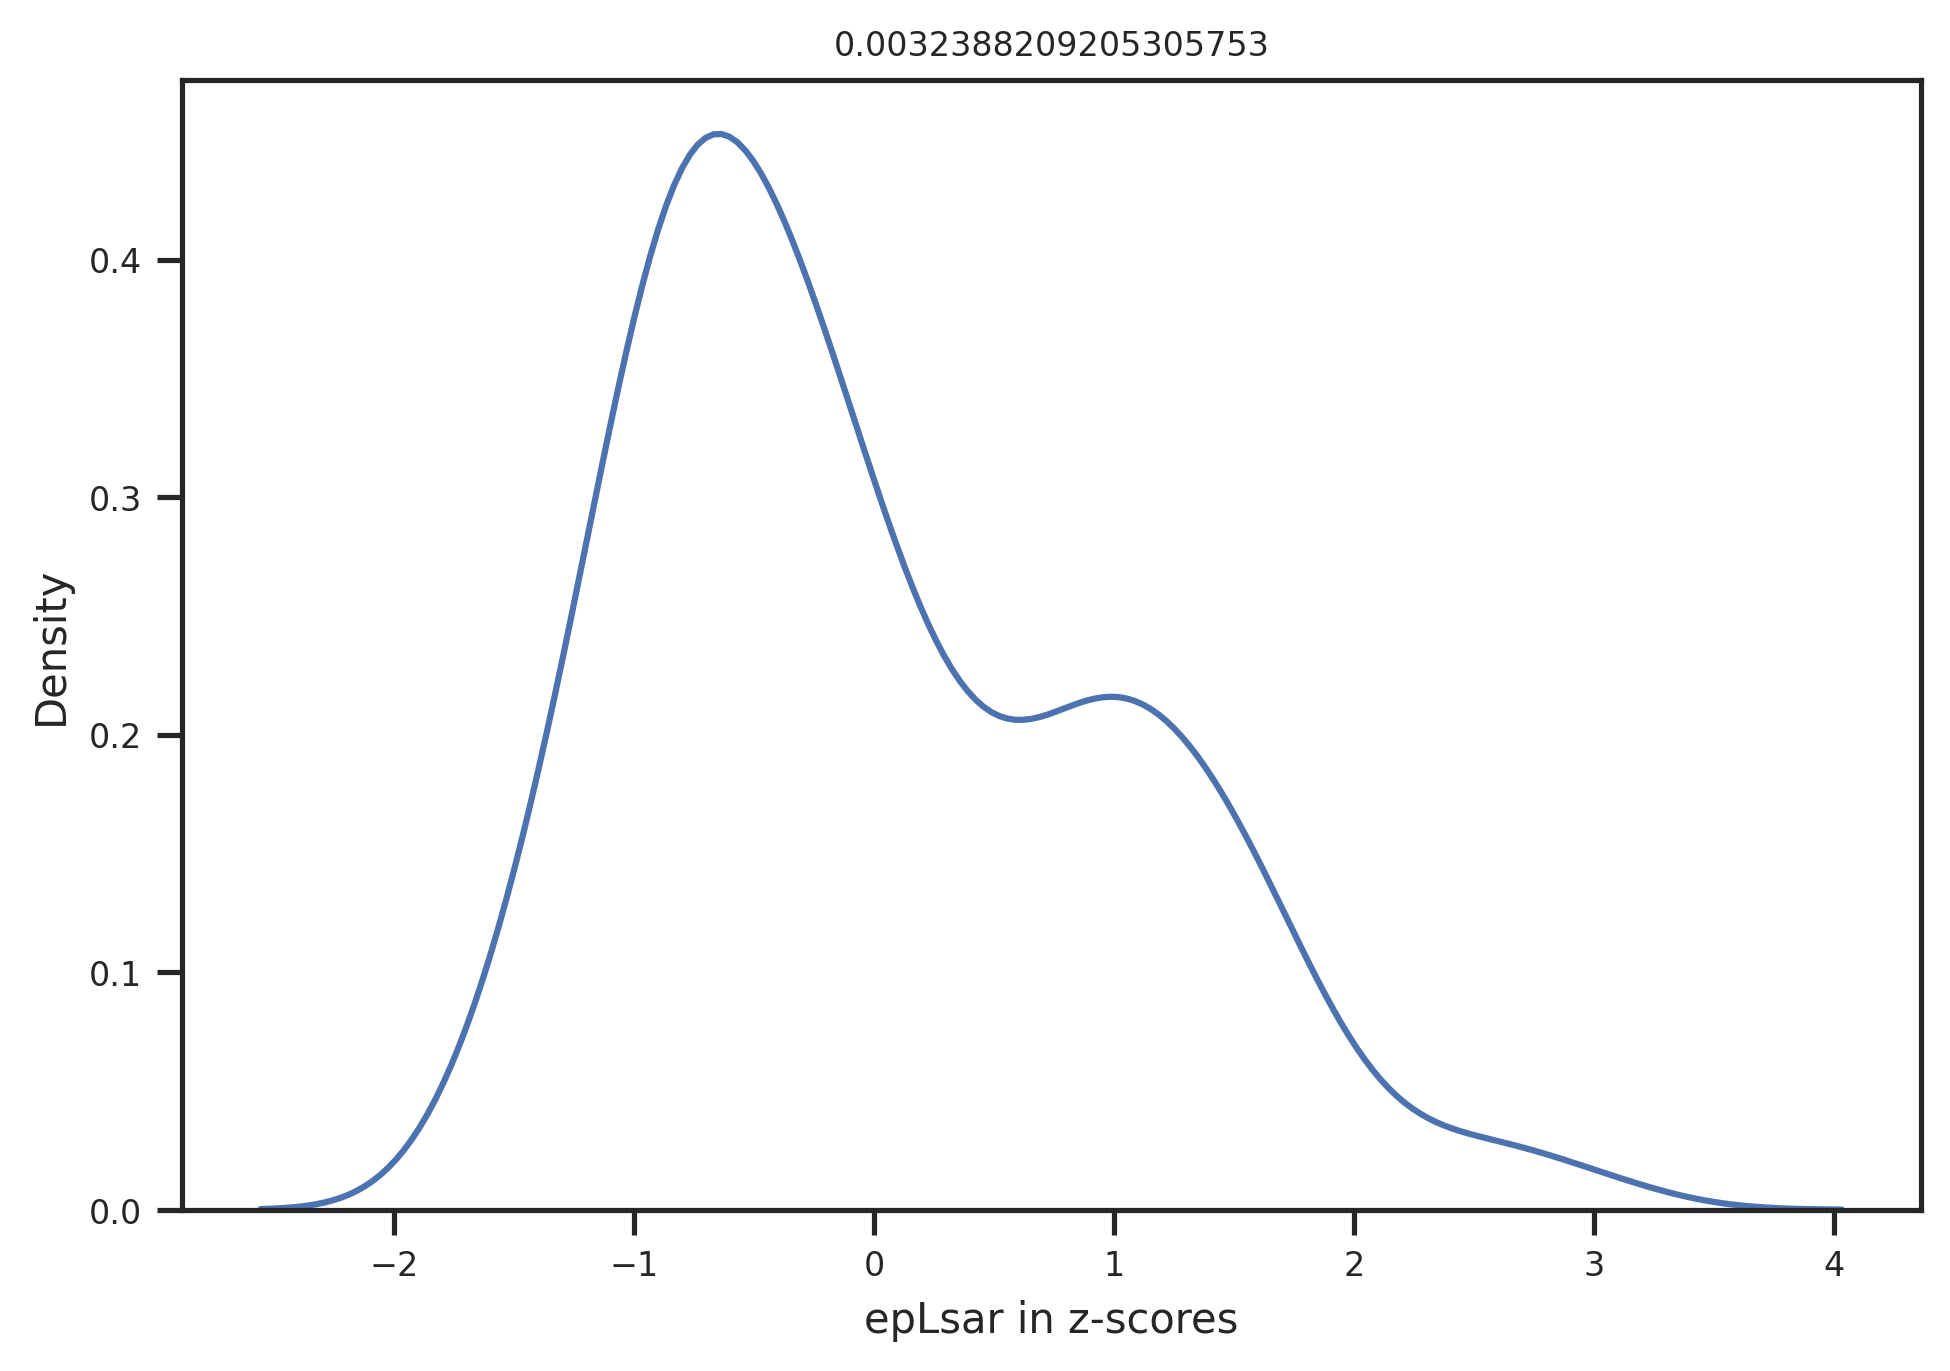

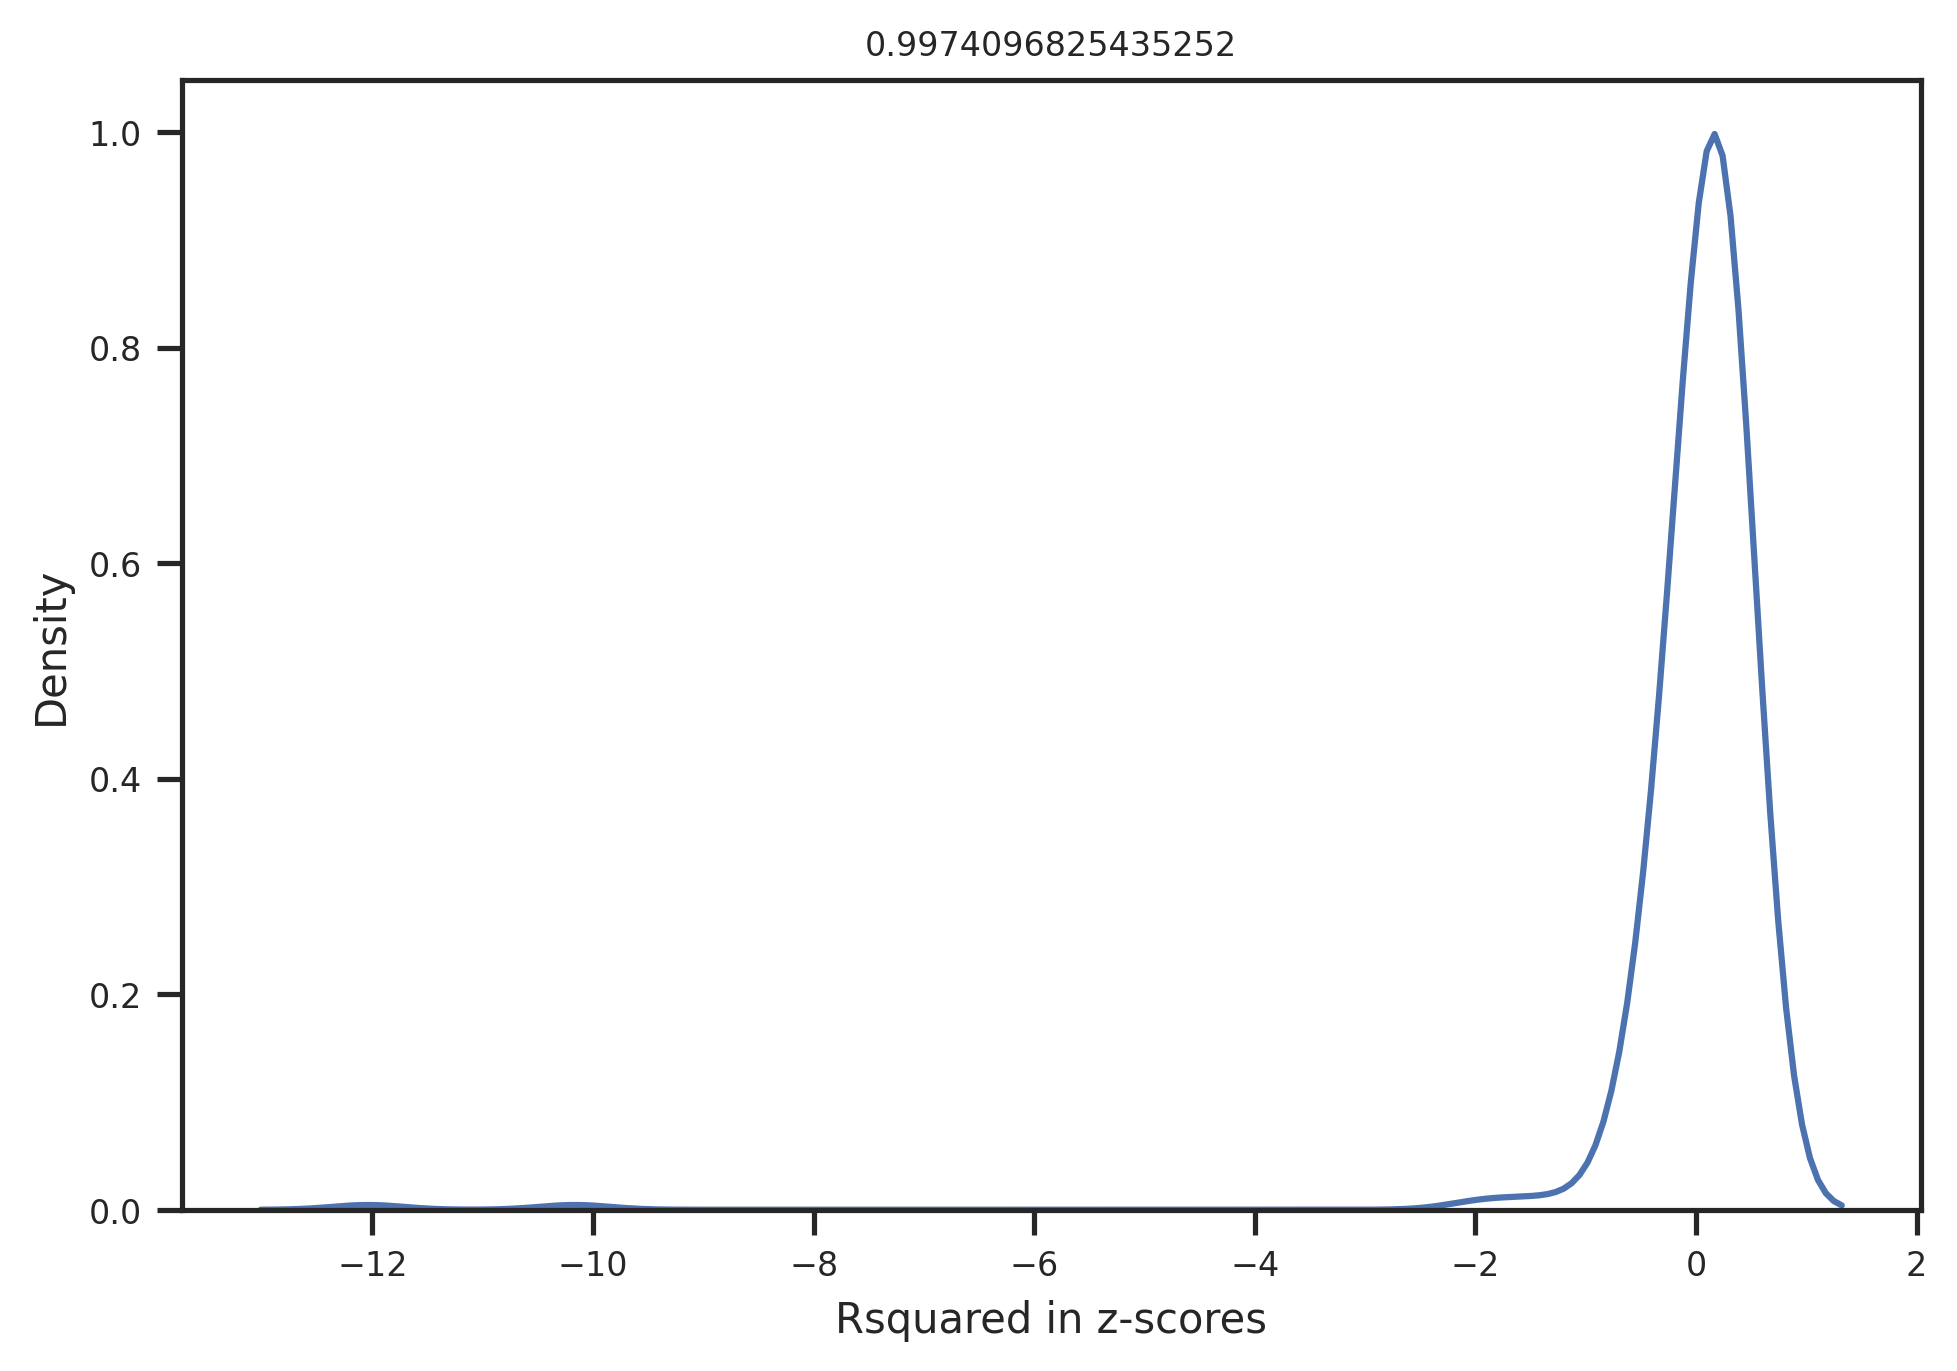

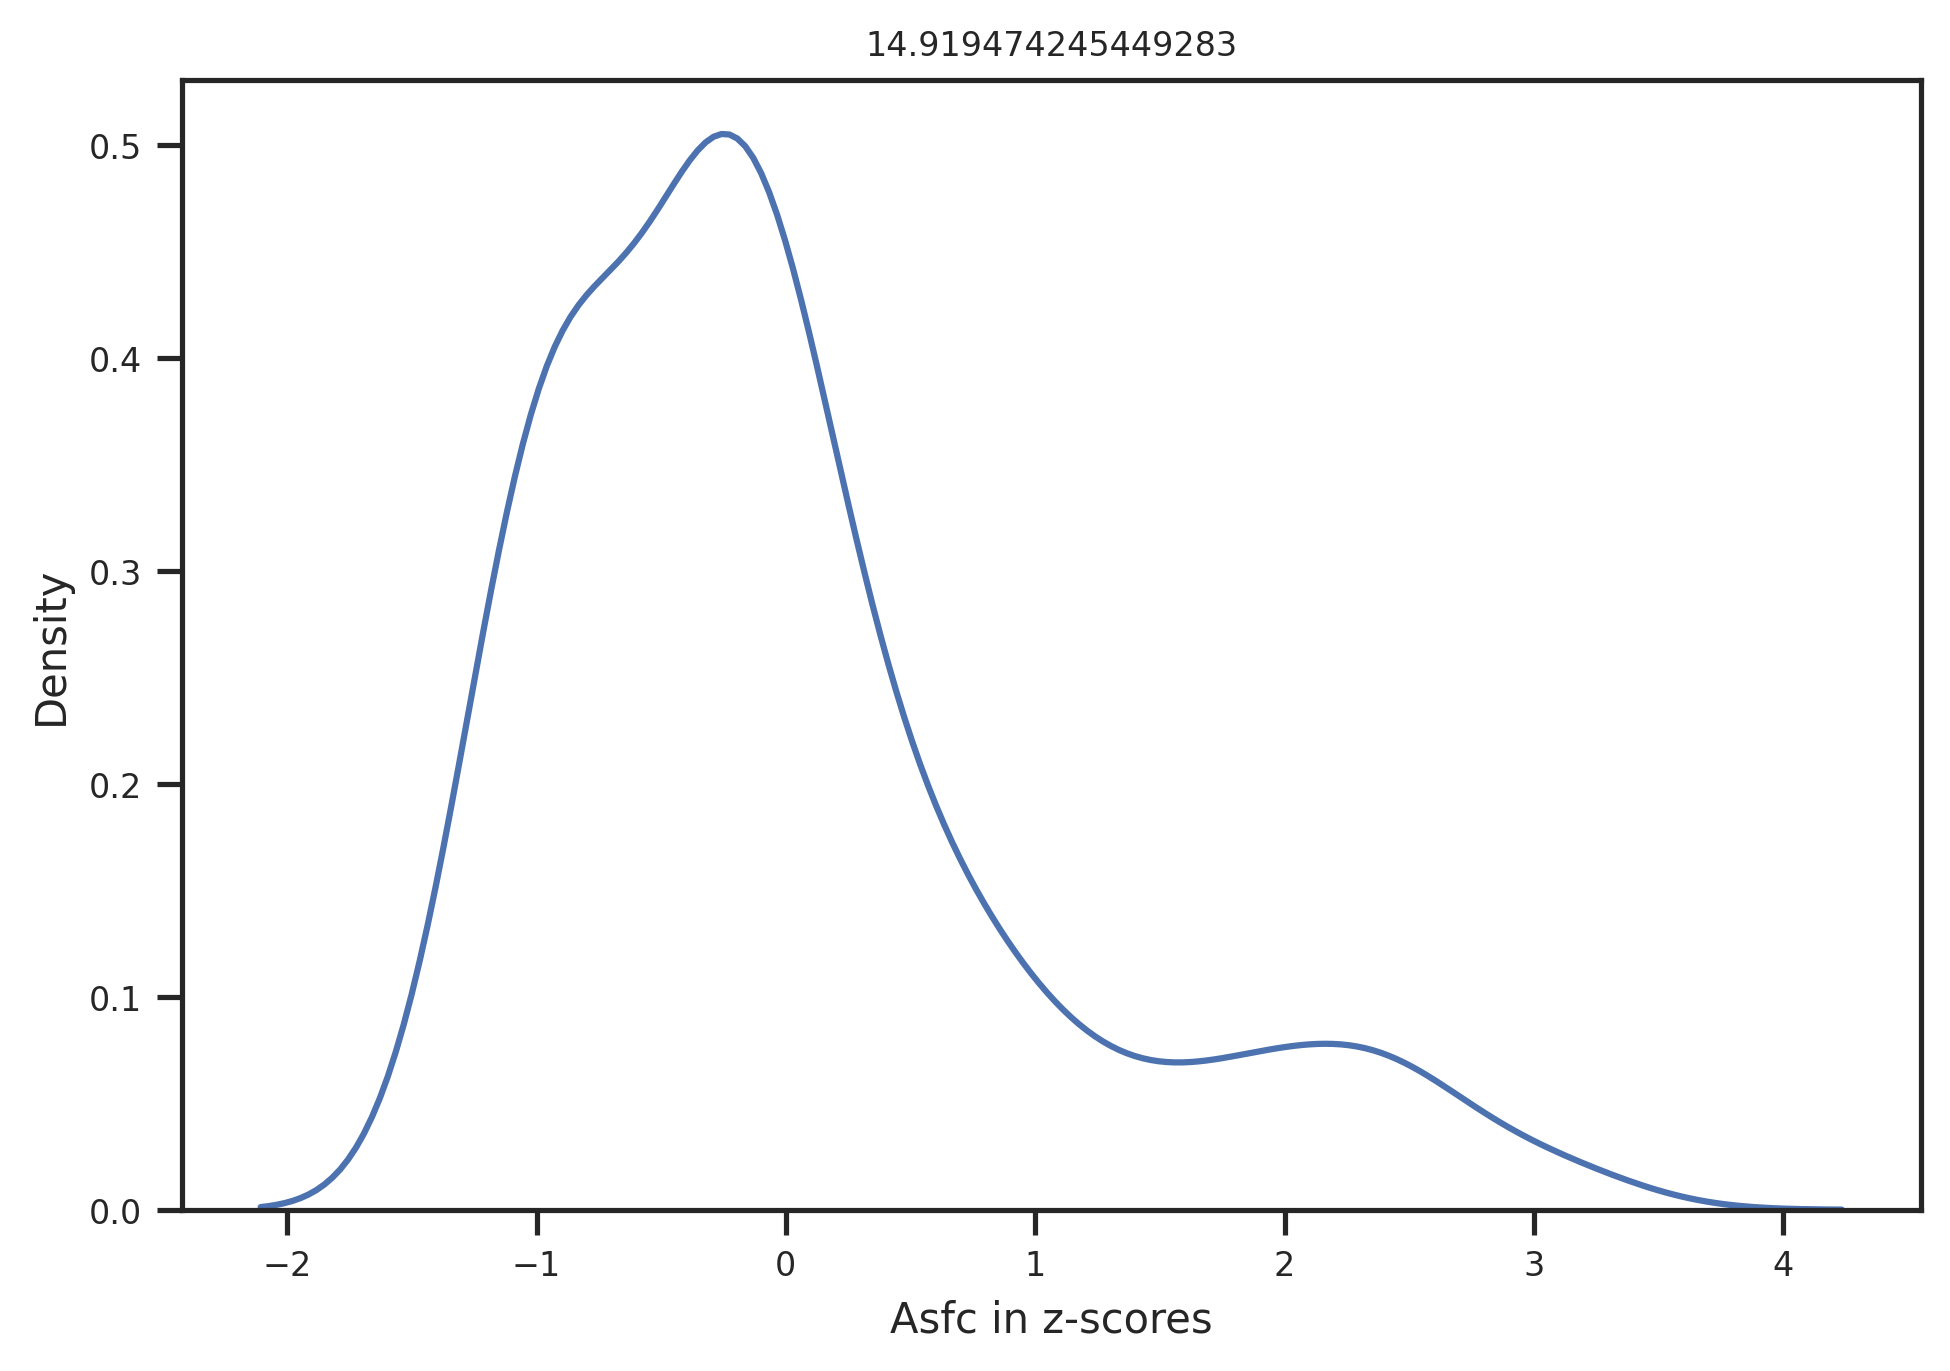

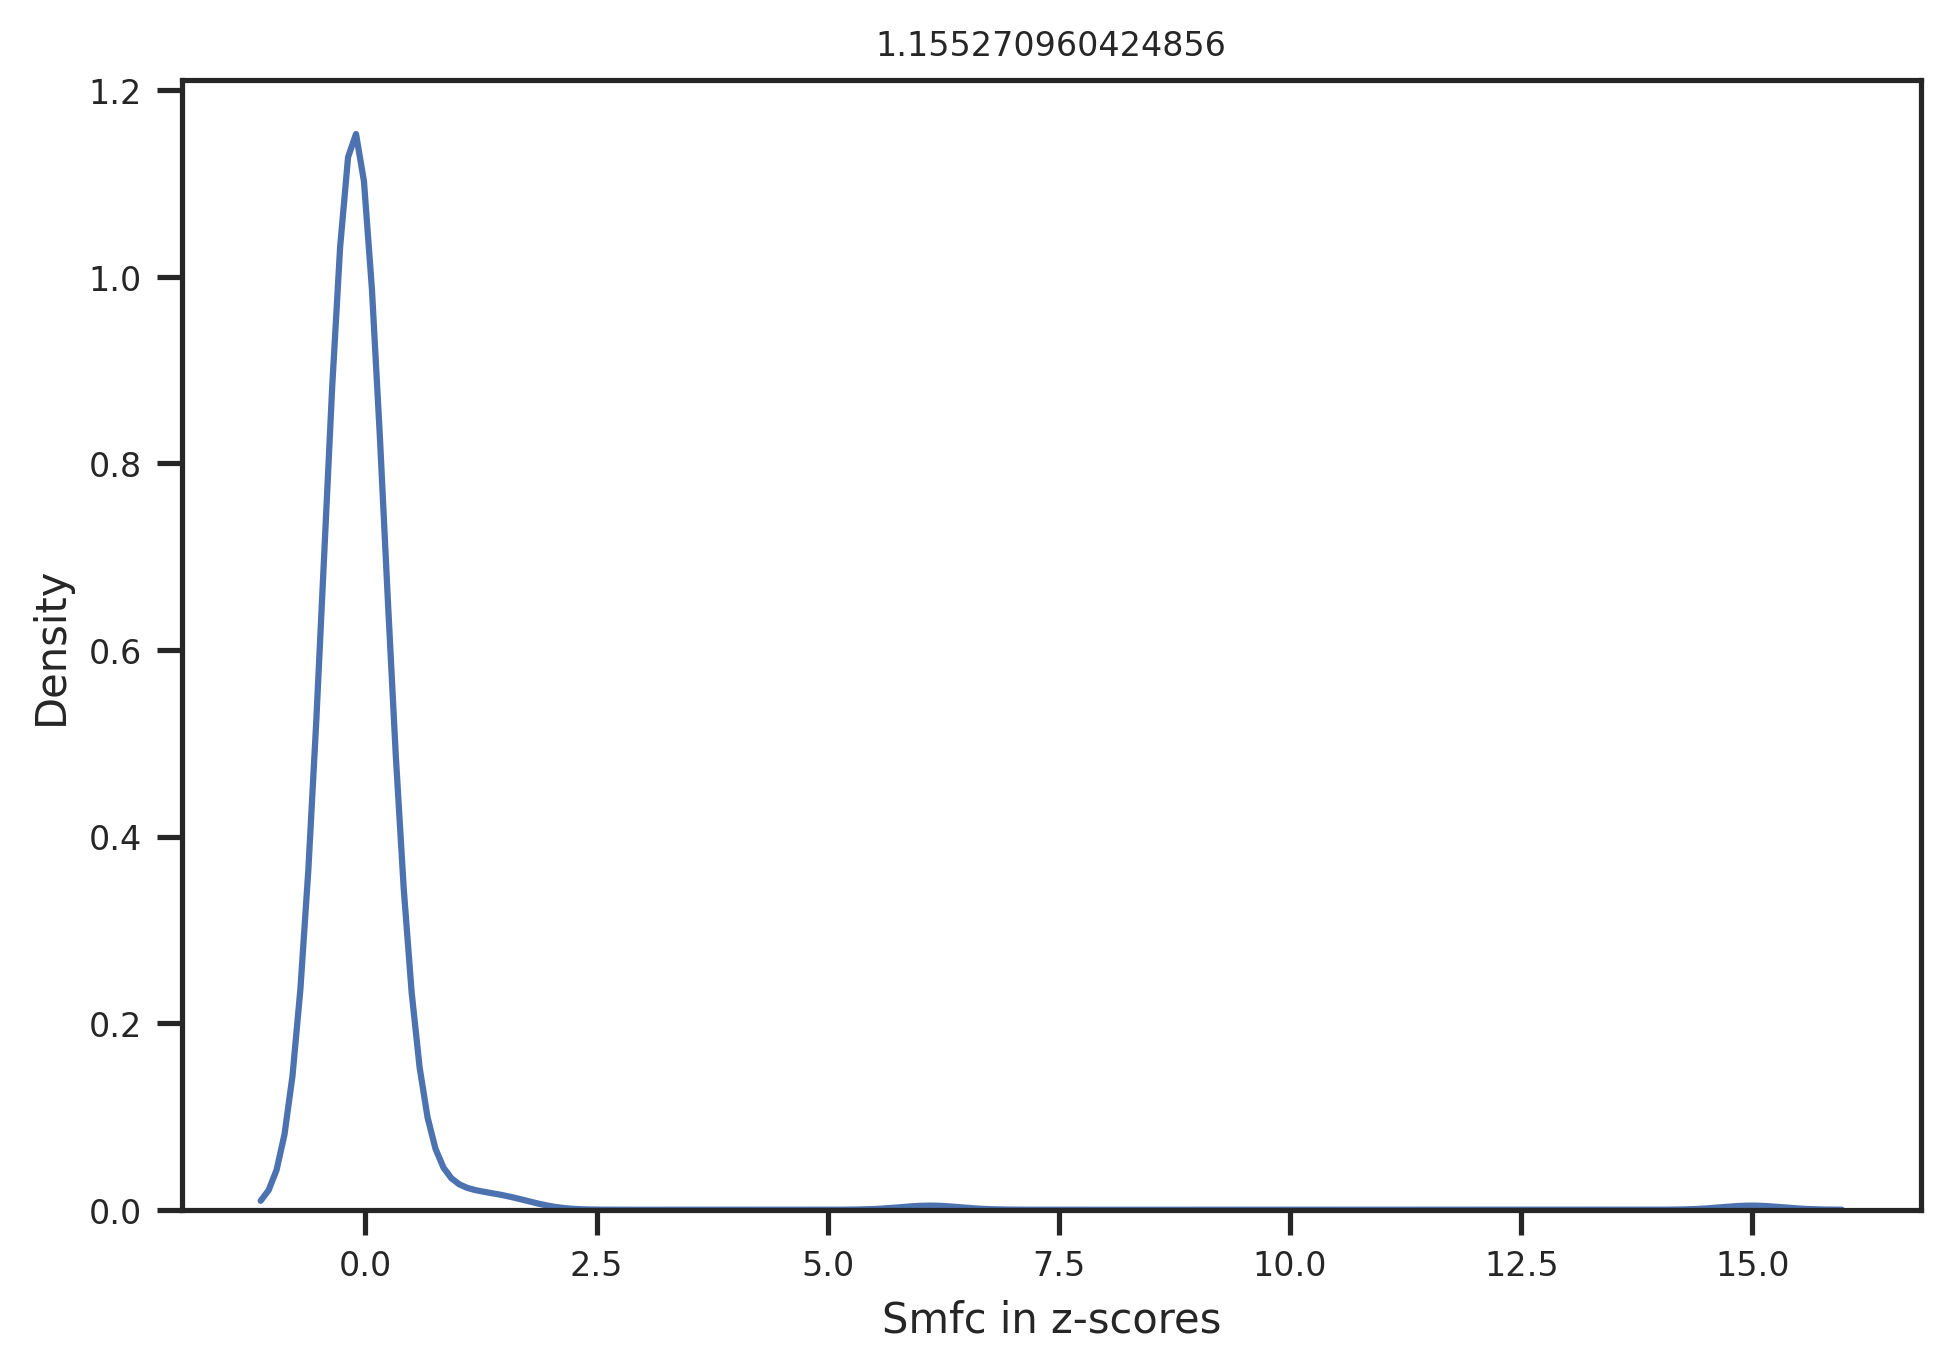

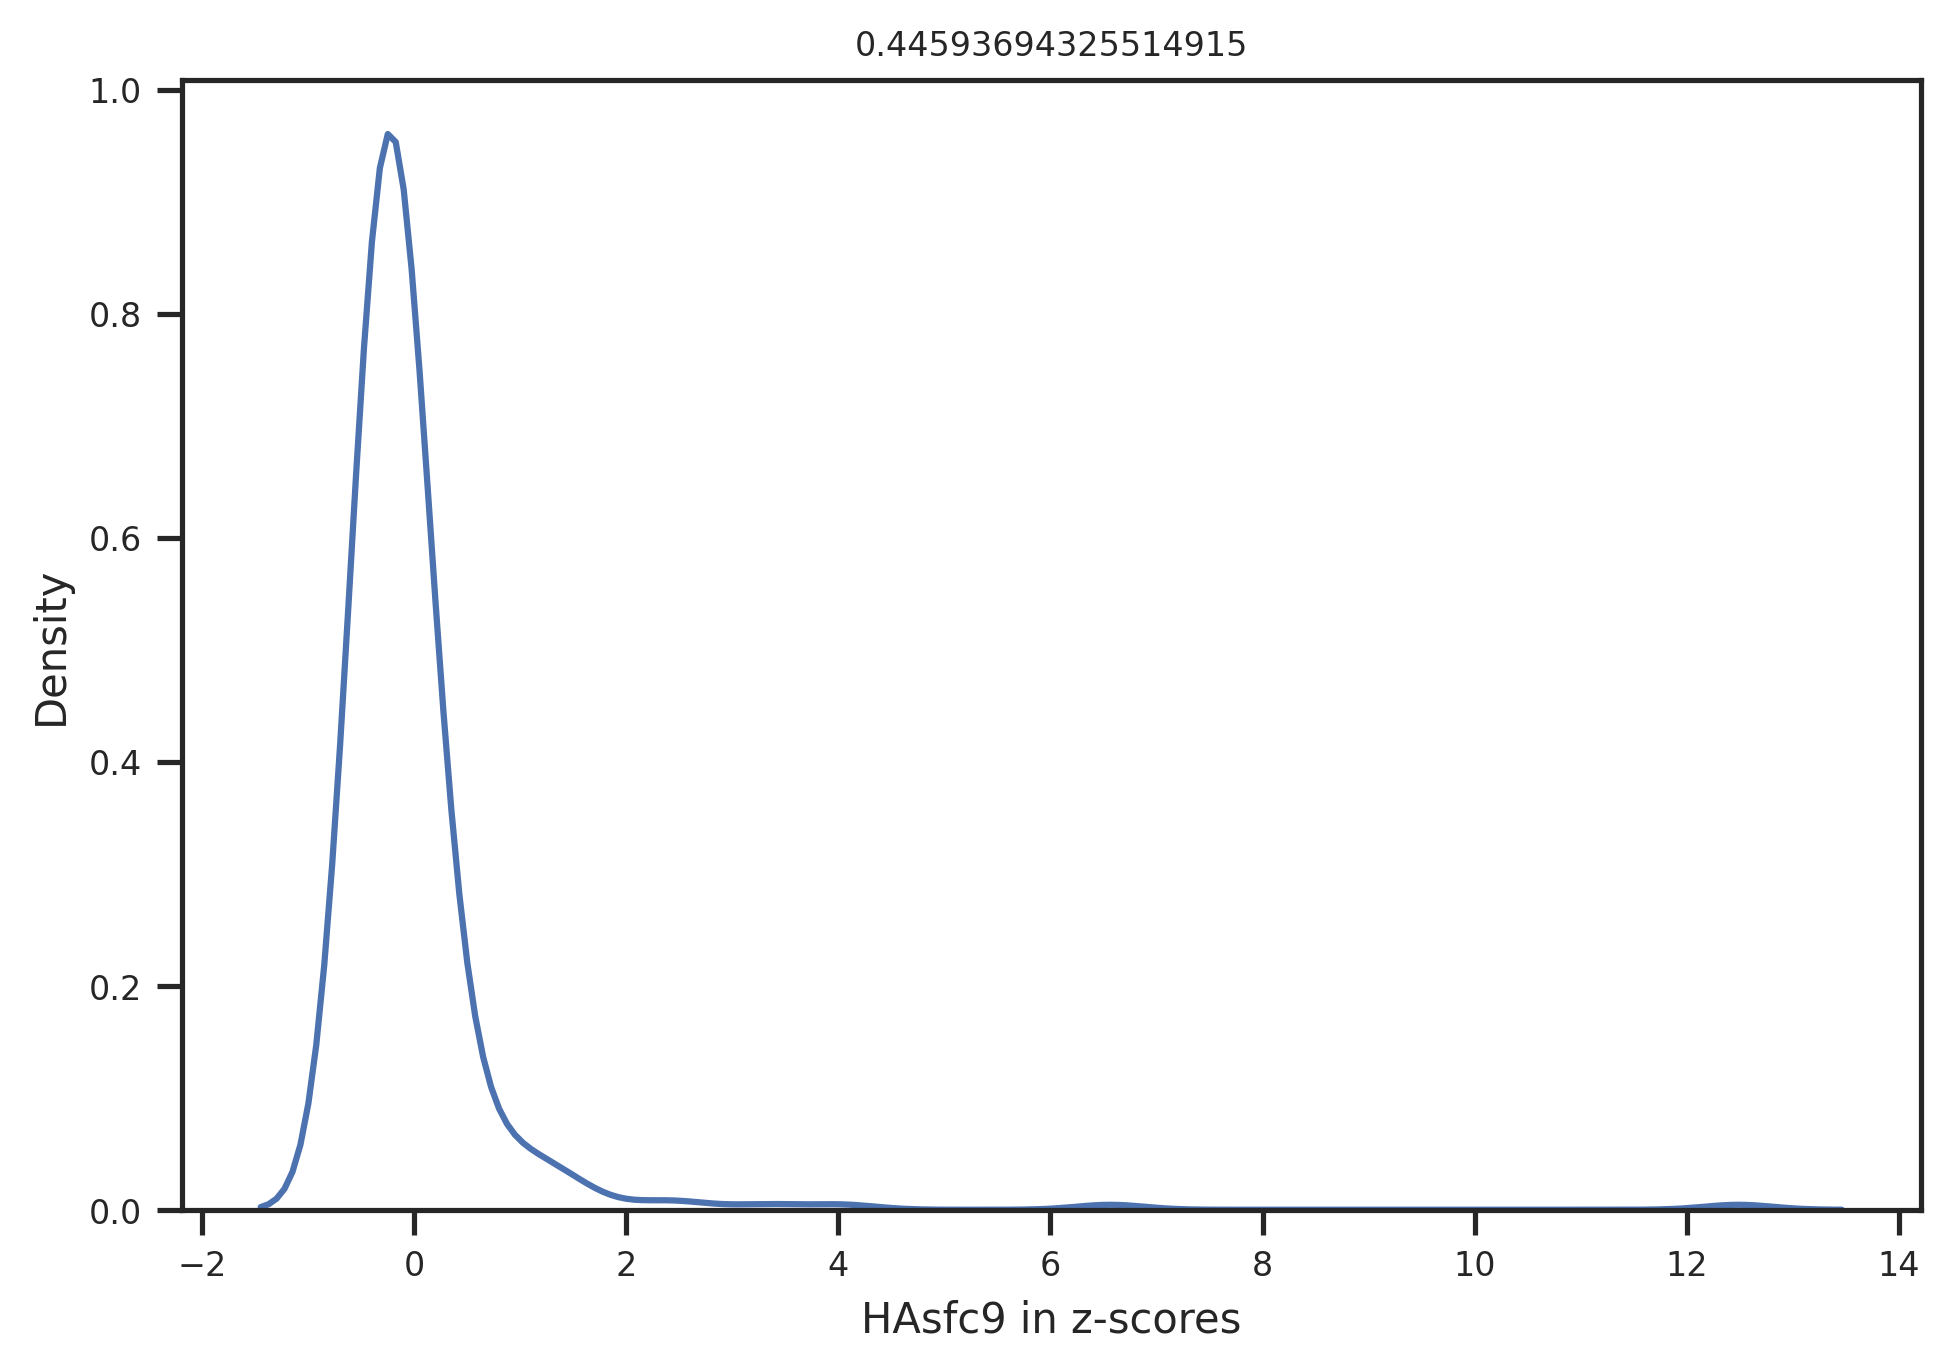

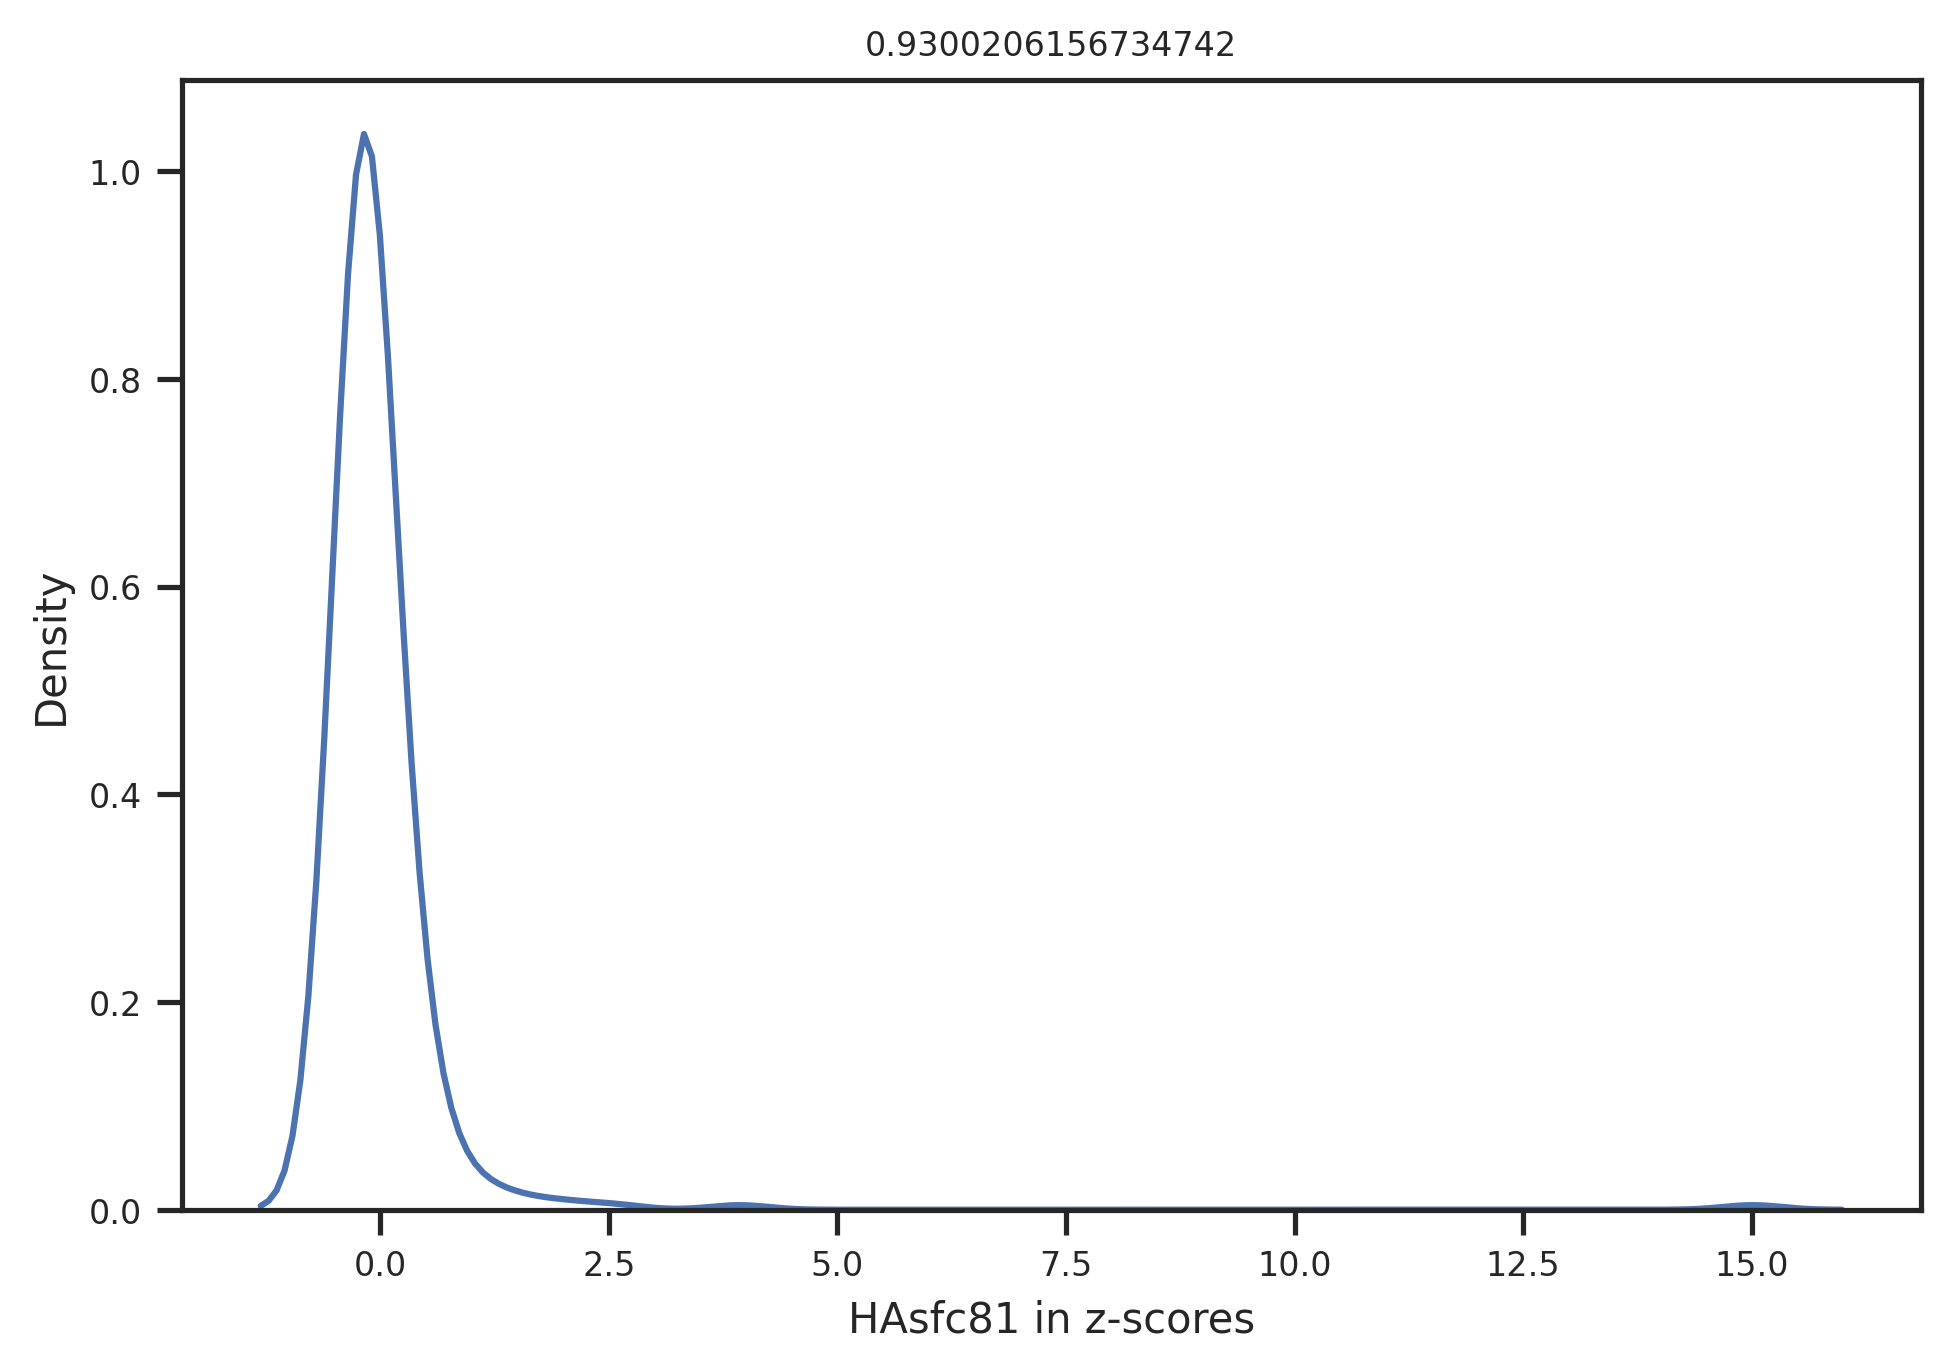

In [17]:
for x in variablesList:
    fig = plt.figure(figsize=(widthInch,heigthInch), dpi= 300, facecolor='w');
    
    mean = dataDF[x].mean()
    std = dataDF[x].std()
    dictMeanStd[x] = (mean,std)
    
    sns.kdeplot((dataDF[x]-mean)/std);
    
    plt.xlabel("{} in z-scores".format(x))    
    plt.title(mean)
    plt.show()

Although there are some high values for the z-scores, all parameters seem to be usable for conversion to z-scores.

Show values again:

In [18]:
dictMeanStd

{'epLsar': (0.0032388209205305753, 0.0019378273835719989),
 'Rsquared': (0.9974096825435252, 0.007283582118542012),
 'Asfc': (14.919474245449283, 12.47068676838922),
 'Smfc': (1.155270960424856, 7.13503174525663),
 'HAsfc9': (0.44593694325514915, 0.7912033512620836),
 'HAsfc81': (0.9300206156734742, 2.3638534390774013)}

Perform conversion to z-scores for better numerical stability and model generality

In [19]:
dataZ = dataDF[['TreatmentNumber','SoftwareNumber','DatasetNumber','NameNumber']].copy().reset_index()
for x in variablesList:
    (mean,std) = dictMeanStd[x]
    dataZ["{}_z".format(x)] = (dataDF[x]-mean)/std    
dataZ

,index,TreatmentNumber,SoftwareNumber,DatasetNumber,NameNumber,epLsar_z,Rsquared_z,Asfc_z,Smfc_z,HAsfc9_z,HAsfc81_z
0,0,5,0,0,115,0.608031,0.081494,-0.261684,-0.120632,-0.391977,-0.239736
1,1,5,1,0,115,0.764866,0.295228,-0.368764,-0.145206,-0.392397,-0.240365
2,2,5,0,0,116,1.355641,-0.166422,0.043912,-0.120632,-0.346351,-0.268091
3,3,5,1,0,116,1.350574,0.282460,-0.137943,-0.145206,-0.349727,-0.282929
4,4,5,0,0,117,0.930308,-0.359987,-0.137793,-0.120632,-0.233444,-0.221925
...,...,...,...,...,...,...,...,...,...,...,...
273,273,9,1,2,52,0.611602,0.267769,-1.050437,0.035516,0.493708,0.076860
274,274,9,0,2,53,0.084569,0.197735,-0.966638,-0.093723,0.242115,0.257597
275,275,9,1,2,53,-0.051512,0.319804,-0.975181,-0.143224,0.644288,0.381453
276,276,9,0,2,54,-1.041990,0.284041,-1.077552,0.011489,-0.095103,-0.053253


#### Extract data vectors

In [20]:
x1 = dataZ.SoftwareNumber.values
x2 = dataZ.TreatmentNumber.values
x3 = dataZ.NameNumber.values
x1,x2,x3

(array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1], dtype=int8),
 array([ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5, 

### Write out  <a name="write"></a>
Write data to disk so that it is usable for all analysis steps later without the need to run this notebook.

In [21]:
data = [x1,x2,x3,df,dataZ,dictMeanStd,dictTreatment,dictSoftware]

In [22]:
datafile = "../derived_data/preprocessing/preprocessed_filter_weak.dat"

In [23]:
with open(datafile, "wb") as f:
    pickle.dump(data, f)

## Export to html and markdown

In [24]:
!jupyter nbconvert --to html Preprocessing_filter_weak.ipynb

[NbConvertApp] Converting notebook Preprocessing_filter_weak.ipynb to html
[NbConvertApp] Writing 1318852 bytes to Preprocessing_filter_weak.html


In [25]:
!jupyter nbconvert --to markdown Preprocessing_filter_weak.ipynb

[NbConvertApp] Converting notebook Preprocessing_filter_weak.ipynb to markdown
[NbConvertApp] Support files will be in Preprocessing_filter_weak_files/
[NbConvertApp] Making directory Preprocessing_filter_weak_files
[NbConvertApp] Making directory Preprocessing_filter_weak_files
[NbConvertApp] Making directory Preprocessing_filter_weak_files
[NbConvertApp] Making directory Preprocessing_filter_weak_files
[NbConvertApp] Making directory Preprocessing_filter_weak_files
[NbConvertApp] Making directory Preprocessing_filter_weak_files
[NbConvertApp] Writing 50782 bytes to Preprocessing_filter_weak.md
